<a href="https://colab.research.google.com/github/ecandes/stat318/blob/master/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sampling from the Ising model via Metropolis 

We wish to sample from the Ising model 

$$
\pi(x) = \frac{1}{Z} \exp(-\beta E(x)) \qquad E(x) = - \sum_{v \sim v'} x_v x_{v'} 
$$

defined on a graph $G$, where $v \sim v'$ means that the nodes are adjacent. In the energy functional above, each edge is coounted only once. With this formulation, the critical value of $\beta$ is 

$$
\beta_c = \frac{\log(1+\sqrt{2})}{2} \approx 0.4407
$$

The corresponding critical temperature is 

$$
T_c = \frac{2}{\log(1+\sqrt{2})} \approx 2.2691
$$


In [0]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

plt.rcParams["figure.figsize"] = (4,4)
Tc = 2/np.log(1+np.sqrt(2))

## Metropolis-Hastings 

We consider the Metropolis algorithm to do this: for $t = 1, \ldots$

- select a site uniformly at random and flip the sign
- accept the move with probability 

$$
\min(\pi(y)/\pi(x), 1) = e^{-\beta(E(y) - E(x))} \wedge 1 
$$ 

There is a convenient expression for the right-hand side:

$$
 \exp(-\beta(E(y) - E(x))) = \exp(-2\beta x_v g_v) \qquad g_v = \sum_{v': v' \sim v} x_v. 
$$ 

We work with the square lattice for our graph $G$ represented below. 

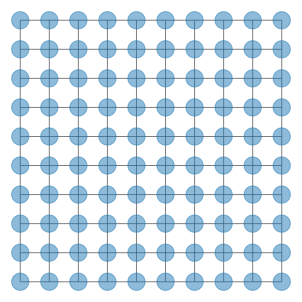

In [4]:
plt.rcParams["figure.figsize"] = (4,4)
L = 10
G = nx.grid_2d_graph(L,L)
nx.draw(G,pos=dict(zip(G.nodes.keys(),G.nodes.keys())),nodesize=150,alpha=0.5)


In [0]:
class IsingModel:

    def __init__(self, G, X=None):
        self.G = G                   # Underlying graph
        self.n = G.number_of_nodes()  # Number of nodes
        self.nodes = list(G.nodes.keys())  # List of nodes
        if X is None:
            X = np.ones(self.n).astype(int)
        # Configuration : 0/1 = free/occupied site
        self.X = dict(zip(self.nodes, X))
        # Useful for plotting
        self.pos = dict(zip(self.nodes, self.nodes))

    def sumNeighbors(self, v):
        return np.sum(np.array([self.X[w] for w in self.G.neighbors(v)]))

    def sum(self):
        return np.array(list(self.X.values())).sum()

    def update(self, v, bit):
        self.X[v] = bit

    def drawConfig(self, node_size=150):
        up = [key for key in self.X.keys() if self.X[key] == 1]
        down = [key for key in self.X.keys() if self.X[key] == -1]
        options = {"node_size": 200, "alpha": 1}
        nx.draw(G, self.pos, nodelist=up,   node_color="b", **options)
        nx.draw(G, self.pos, nodelist=down, node_color="r", **options)
        plt.title('Ising model configuration')
        plt.show()

    def sample(self, T, beta =1, X0=None):
        if not X0 is None:
            self.X = X0
        sumlist = [self.sum()]
        # Sample vertices (numpy knows how to sample from 1D arrays only)
        Vlist = np.random.choice(self.n, T, replace=True)
        Vlist = [self.nodes[v] for v in Vlist]
        # Sample uniform variables
        Ulist = np.random.rand(T)

        for [v, u] in zip(Vlist, Ulist):
            val = self.X[v]
            if u < min(np.exp(-2*beta*val*self.sumNeighbors(v)),1):
              self.update(v,-val)
         
            sumlist.append(sumlist[-1] - val + self.X[v])
        return sumlist


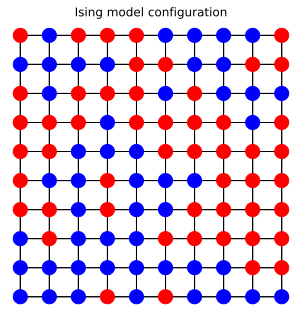

Magnetization at T = 10000: -2


In [8]:
Temp = 2*Tc
beta = 1/Temp
plt.rcParams["figure.figsize"] = (4,4)
chain = IsingModel(G)
T = 10000
sumlist = chain.sample(T,beta)
chain.drawConfig()
print('Magnetization at T = {}: {}'.format(T,sumlist[-1]))

We are interested in magentization $M$ at time defined as 

$$
M =  f(x) = \sum_v x_v
$$

We start from the current configuration, run the chain $T$ steps and compute 

$$
\frac{1}{T} \sum_{t = 1}^T f(X_t).
$$


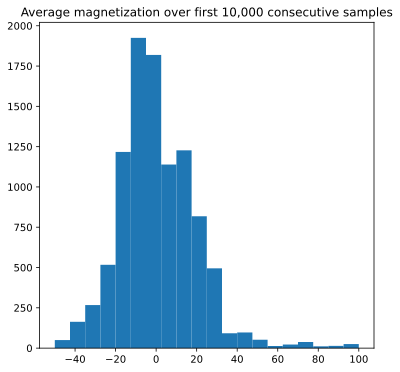

In [9]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over first 10,000 consecutive samples')
plt.show()

Average magnetization: -0.75


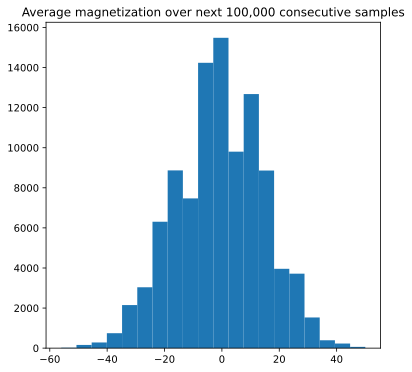

CPU times: user 1.33 s, sys: 5.82 ms, total: 1.34 s
Wall time: 1.34 s


In [10]:
%%time
T = 100000
sumlist = chain.sample(T,beta)
print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over next 100,000 consecutive samples')
plt.show()

We repeat this 10 times.

In [11]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T,beta)
    print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average magnetization: 0.32
Average magnetization: -0.84
Average magnetization: 1.03
Average magnetization: 0.27
Average magnetization: 2.56
Average magnetization: -0.62
Average magnetization: -0.13
Average magnetization: 1.82
Average magnetization: 0.60
Average magnetization: -0.10
CPU times: user 11.5 s, sys: 21.6 ms, total: 11.5 s
Wall time: 11.5 s


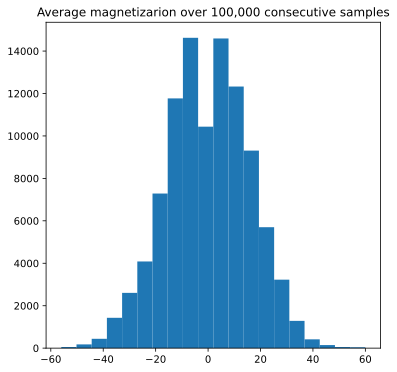

In [12]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetizarion over 100,000 consecutive samples')
plt.show()

### Colder temperature

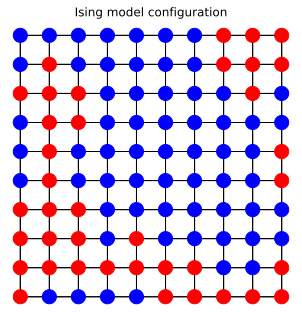

Magnetization at T = 10000: 24


In [26]:
Temp = 1.2*Tc
beta = 1/Temp

plt.rcParams["figure.figsize"] = (4,4)
chain = IsingModel(G)
T = 10000
sumlist = chain.sample(T,beta)
chain.drawConfig()
print('Magnetization at T = {}: {}'.format(T,chain.sum()))


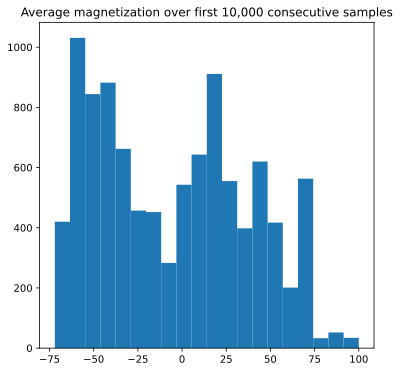

In [27]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over first 10,000 consecutive samples')
plt.show()

Average magnetization: -7.09


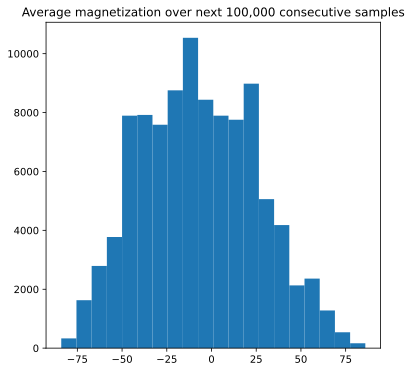

CPU times: user 1.29 s, sys: 4.97 ms, total: 1.3 s
Wall time: 1.3 s


In [28]:
%%time
T = 100000
sumlist = chain.sample(T,beta)
print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over next 100,000 consecutive samples')
plt.show()

In [29]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T,beta)
    print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average magnetization: -3.43
Average magnetization: -0.27
Average magnetization: -1.09
Average magnetization: -6.11
Average magnetization: 6.26
Average magnetization: 4.36
Average magnetization: 6.18
Average magnetization: 4.56
Average magnetization: -1.34
Average magnetization: -6.25
CPU times: user 11.3 s, sys: 6.92 ms, total: 11.3 s
Wall time: 11.3 s


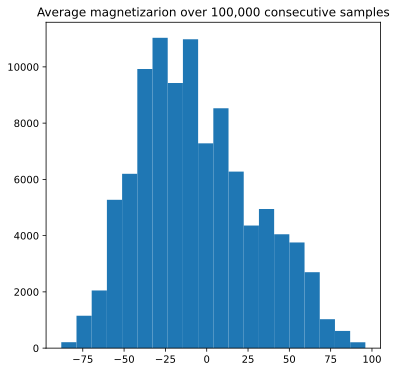

In [30]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetizarion over 100,000 consecutive samples')
plt.show()

### Critical temperature


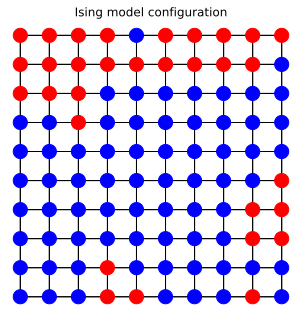

Magnetization at T = 10000: 38


In [31]:
Temp = Tc
beta = 1/Temp

plt.rcParams["figure.figsize"] = (4,4)
chain = IsingModel(G)
T = 10000
sumlist = chain.sample(T,beta)
chain.drawConfig()
print('Magnetization at T = {}: {}'.format(T,chain.sum()))


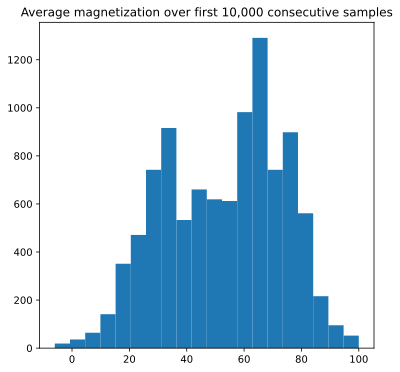

In [32]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over first 10,000 consecutive samples')
plt.show()

Average magnetization: 7.36


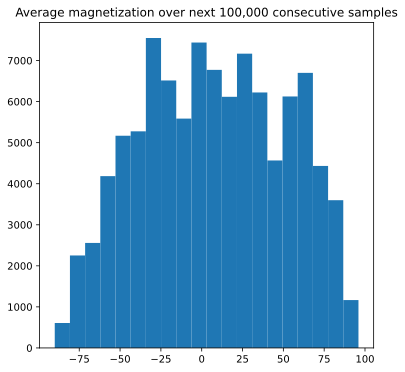

CPU times: user 1.3 s, sys: 2.01 ms, total: 1.3 s
Wall time: 1.3 s


In [33]:
%%time
T = 100000
sumlist = chain.sample(T,beta)
print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over next 100,000 consecutive samples')
plt.show()

In [34]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T,beta)
    print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average magnetization: -20.09
Average magnetization: -3.00
Average magnetization: 17.22
Average magnetization: -7.92
Average magnetization: 12.10
Average magnetization: -21.35
Average magnetization: -11.44
Average magnetization: -17.52
Average magnetization: -20.27
Average magnetization: -2.17
CPU times: user 11.4 s, sys: 15.9 ms, total: 11.4 s
Wall time: 11.4 s


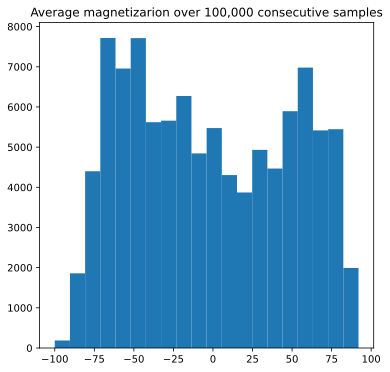

In [35]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetizarion over 100,000 consecutive samples')
plt.show()

### Below critical temperature



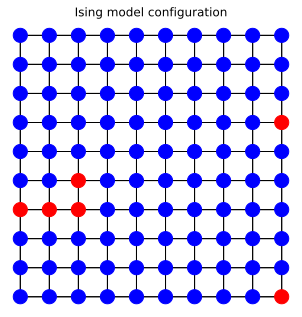

Magnetization at T = 10000: 88


In [36]:
Temp = 0.75*Tc
beta = 1/Tc

plt.rcParams["figure.figsize"] = (4,4)
chain = IsingModel(G)
T = 10000
sumlist = chain.sample(T,beta)
chain.drawConfig()
print('Magnetization at T = {}: {}'.format(T,chain.sum()))


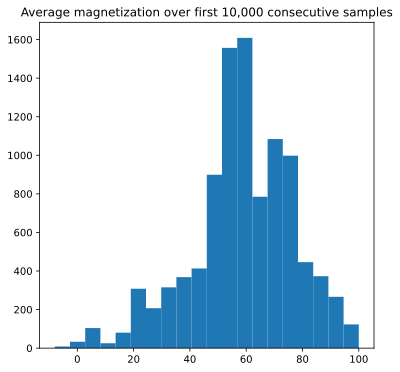

In [37]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over first 10,000 consecutive samples')
plt.show()

Average magnetization: 30.73


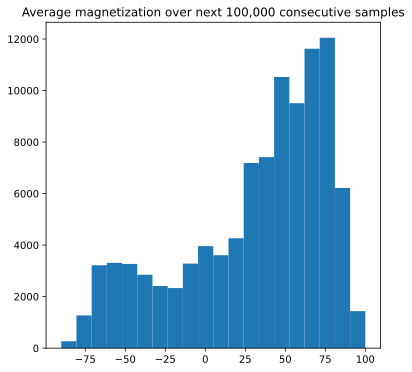

CPU times: user 1.3 s, sys: 4.94 ms, total: 1.31 s
Wall time: 1.32 s


In [38]:
%%time
T = 100000
sumlist = chain.sample(T,beta)
print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))
plt.hist(sumlist,bins=20)
plt.title('Average magnetization over next 100,000 consecutive samples')
plt.show()

In [39]:
%%time
for b in range(10):
    T = 100000
    sumlist = chain.sample(T,beta)
    print('Average magnetization: {:.2f}'.format(np.mean(np.array([sumlist]))))

Average magnetization: 0.61
Average magnetization: -9.02
Average magnetization: 24.67
Average magnetization: -14.15
Average magnetization: -21.28
Average magnetization: -3.81
Average magnetization: 9.87
Average magnetization: -9.79
Average magnetization: 10.85
Average magnetization: -3.09
CPU times: user 11.2 s, sys: 16.9 ms, total: 11.3 s
Wall time: 11.3 s


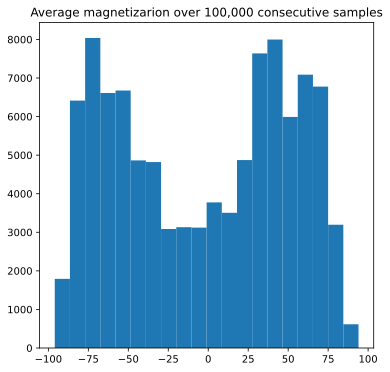

In [40]:
plt.rcParams["figure.figsize"] = (6,6)
plt.hist(sumlist,bins=20)
plt.title('Average magnetizarion over 100,000 consecutive samples')
plt.show()